In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#importing library for visualising the data better.
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#reading the csv file generated from the previous module.
data1 = pd.read_csv('week2.csv',index_col=0)

In [4]:
#analysing tabular data
data1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,PV,Day_Perc_Change,Trend
0,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,2017,5,7.221440e+08,0.000000,Slight or No Change
1,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,2017,5,1.504417e+09,1.744216,Positive
2,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,2017,5,2.018181e+09,0.899640,Slight Positive
3,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,2017,5,2.664706e+09,-1.897167,Negative
4,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,2017,5,3.084294e+09,1.792477,Positive


In [5]:
#finding out the datatype of each column
data1.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Year                        int64
Month                       int64
PV                        float64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [6]:
#changing the datatype of 'Date' column into 'datetime64ns'.
data1['Date'] = data1['Date'].astype('datetime64')

In [7]:
#converting the 'Date' column into the index of the dataframe
data1.set_index(['Date'], inplace = True)

In [8]:
#analysing tabular data.
data1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,PV,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,HINDUNILVR,EQ,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,2017,5,7.221440e+08,0.000000,Slight or No Change
2017-05-16,HINDUNILVR,EQ,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,2017,5,1.504417e+09,1.744216,Positive
2017-05-17,HINDUNILVR,EQ,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,2017,5,2.018181e+09,0.899640,Slight Positive
2017-05-18,HINDUNILVR,EQ,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,2017,5,2.664706e+09,-1.897167,Negative
2017-05-19,HINDUNILVR,EQ,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,2017,5,3.084294e+09,1.792477,Positive


In [9]:
#fixing the size of all the plots made using pyplot.
plt.rcParams['figure.figsize'] = (12,6)

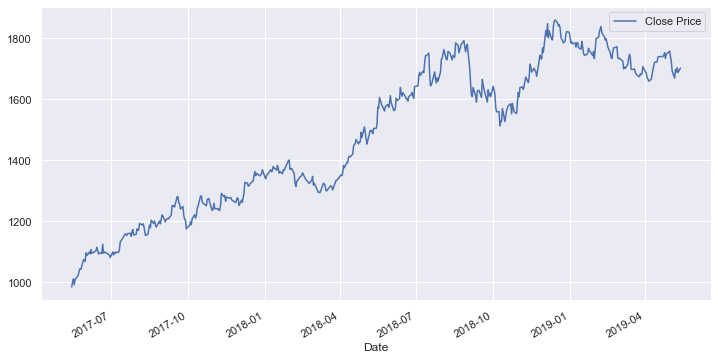

In [10]:
#plotting the 'Close Price' of the entire timeframe.
data1.plot(y = 'Close Price')

In [11]:
#obtaning  the highest difference that is drastic changes and sorting them in descending order.
dat = data1['Close Price'].diff().abs().sort_values(ascending = False)

In [12]:
# looking at the dates with the changes in stock prices.
dat

Date
2018-09-03    81.00
2018-12-03    71.60
2018-07-17    69.55
2018-11-26    68.90
2018-09-18    59.50
              ...  
2018-04-10     0.10
2019-04-22     0.05
2018-05-09     0.05
2018-07-03     0.05
2017-05-15      NaN
Name: Close Price, Length: 494, dtype: float64

In [13]:
# fetching the news for each date using the concept of 'Web Scraping'.
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
url_2018_09_03 = 'https://economictimes.indiatimes.com/markets/stocks/news/stock-market-update-fmcg-stocks-under-pressure-hul-plunges-over-3/articleshow/65656180.cms?from=mdr'
r = requests.get(url_2018_09_03) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('h1',class_ = 'clearfix title')
print(" 2018-09-03")
print("News:")
print('\n')
print (stock_news_title_container.text)

print("-------------------------------------------------------------")

url_2018_12_03 = 'https://www.livemint.com/market/mark-to-market/gsk-timed-gsk-consumer-sale-well-but-minority-investors-timed-it-to-perfection-11588839799816.html'
r = requests.get(url_2018_12_03) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'paywall')
print(" 2018-12-03")
print("News:")
print('\n')
print (stock_news_title_container.p.text)

print("-------------------------------------------------------------")

url_2018_07_17 = 'https://trendlyne.com/posts/1546066/hindustan-unilever-ltd-result-update-17-july-2018'
r = requests.get(url_2018_07_17) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'card-text newstext card-blockquote')
print(" 2018-07-17")
print("News:")
print (stock_news_title_container.text)

print("-------------------------------------------------------------")

print('No News on 26th November 2018')

print("-------------------------------------------------------------")

url_2018_09_18 = 'https://www.cnbctv18.com/videos/market/stocks/rajat-bose-on-september-18-buy-biocon-hindustan-unilever-843801.htm'
r = requests.get(url_2018_09_18) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('h1',class_ = 'h1')
print(" 2018-09-18")
print("News:")
print('\n')
print (stock_news_title_container.text)

print("-------------------------------------------------------------")


 2018-09-03
News:


Stock market update: FMCG stocks under pressure; HUL plunges over 3%
-------------------------------------------------------------
 2018-12-03
News:


In December 2018, when Hindustan Unilever Ltd (HUL) announced the acquisition of GlaxoSmithKline Consumer Healthcare Ltd (GSK Consumer), the former’s shares were around  ₹1,717 each. But only in May 2020 did GSK Consumer’s parent company GlaxoSmithKline Plc (GSK) sell the HUL shares it had received as compensation.
-------------------------------------------------------------
 2018-07-17
News:

                    


    
        
        HUL announced the integration of food and refreshment categories in South Asia, effective from July 1, 2018. This integration will help HUL to increase organizational agility and better serve local consumers while harnessing the advantage of global scale. The integration of these two categories is also in alignment with the structure of Unilever globally....
    


                
-

In [14]:
#saving the column 'Day_Perc_Change' into a varible 'y'.
y = data1.Day_Perc_Change

In [15]:
#saving the index values into a variable 'x'.
x = data1.index

(array([736511., 736603., 736695., 736785., 736876., 736968., 737060.,
        737150.]),
 <a list of 8 Text xticklabel objects>)

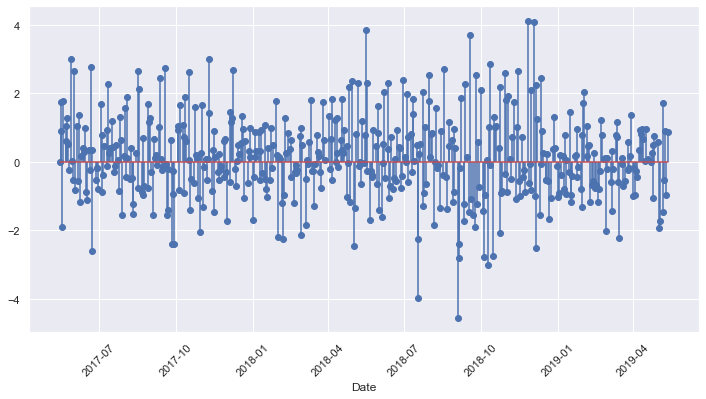

In [16]:
#creating a stem plot of 'Day_Perc_Change' with respect to timeframe.
plt.stem(x,y,use_line_collection=True)
plt.xlabel('Date')  #labelling the x-axis
plt.xticks(rotation=45) #rotating the labels of x-axis with 45degrees

(array([736511., 736603., 736695., 736785., 736876., 736968., 737060.,
        737150.]),
 <a list of 8 Text xticklabel objects>)

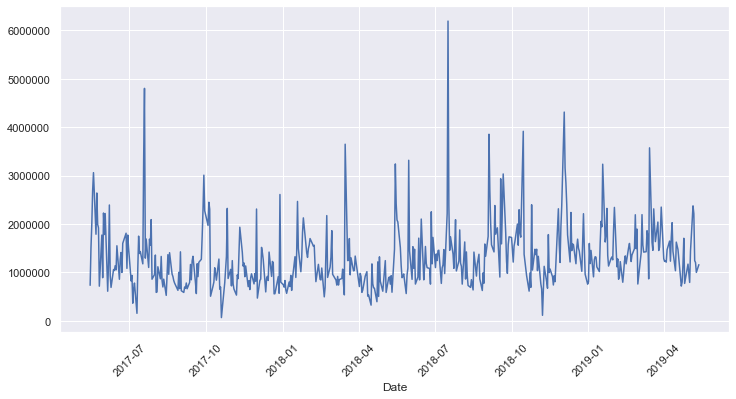

In [17]:
#plotting the Volumne that is 'Total Traded Quantity'
plt.plot(data1['Total Traded Quantity'])
plt.xlabel('Date') #labelling the x-axis
plt.xticks(rotation=45)  #rotating the labels of x-axis with 45degrees

C:\Users\anuditakeshri\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


(array([736511., 736603., 736695., 736785., 736876., 736968., 737060.,
        737150.]),
 <a list of 8 Text xticklabel objects>)

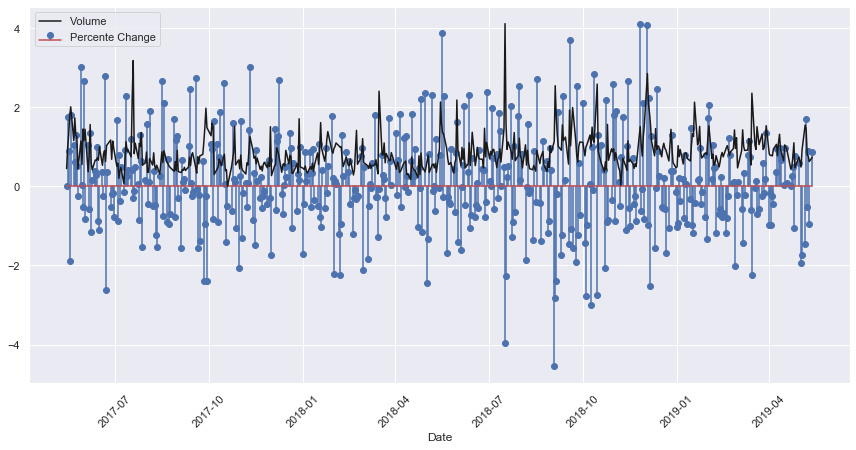

In [18]:
#combining the stem plot and normal plot in a single graph.
scaledvolume =  data1["Total Traded Quantity"] - data1["Total Traded Quantity"].min()
scaledvolume = scaledvolume/scaledvolume.max() * data1.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(data1.index, data1.Day_Perc_Change , 'b', markerfmt='bo', label='Percente Change')
ax.plot(data1.index, scaledvolume, 'k', label='Volume')

ax.set_xlabel('Date')
plt.legend(loc=2)

plt.tight_layout()
plt.xticks(rotation=45)

In [19]:
#grouping the data according to the 'Trend' column and saving it.
p =data1.groupby(['Trend'])

In [20]:
#Ananlysing the first values of all groups.
p.first()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,PV,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,,
Among Top Gainers,HINDUNILVR,EQ,1040.95,1041.0,1077.00,1038.75,1073.0,1072.25,1065.77,1771026,1.887508e+09,63186,1112200,62.80,2017,5,1.898983e+09,3.006869
Among Top Losers,HINDUNILVR,EQ,1751.25,1767.0,1780.00,1678.20,1688.0,1681.70,1712.73,6188478,1.059919e+10,165557,1262015,20.39,2018,7,1.040716e+10,-3.971449
Negative,HINDUNILVR,EQ,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,2017,5,2.664706e+09,-1.897167
Positive,HINDUNILVR,EQ,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,2017,5,1.504417e+09,1.744216
Slight Negative,HINDUNILVR,EQ,1072.60,1065.8,1074.45,1061.05,1070.0,1067.00,1067.74,2226704,2.377542e+09,72236,1834087,82.37,2017,5,2.375893e+09,-0.522096
Slight Positive,HINDUNILVR,EQ,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,2017,5,2.018181e+09,0.899640
Slight or No Change,HINDUNILVR,EQ,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,2017,5,7.221440e+08,0.000000


In [21]:
#calculating the total number of values present in each group.
counting = p['Trend'].count()
counting

Trend
Among Top Gainers        6
Among Top Losers         3
Negative                72
Positive                93
Slight Negative         72
Slight Positive         70
Slight or No Change    178
Name: Trend, dtype: int64

In [22]:
#converting the saved values into a new dataframe.
data2 = counting.to_frame()
data2

,Trend
Trend,
Among Top Gainers,6
Among Top Losers,3
Negative,72
Positive,93
Slight Negative,72
Slight Positive,70
Slight or No Change,178


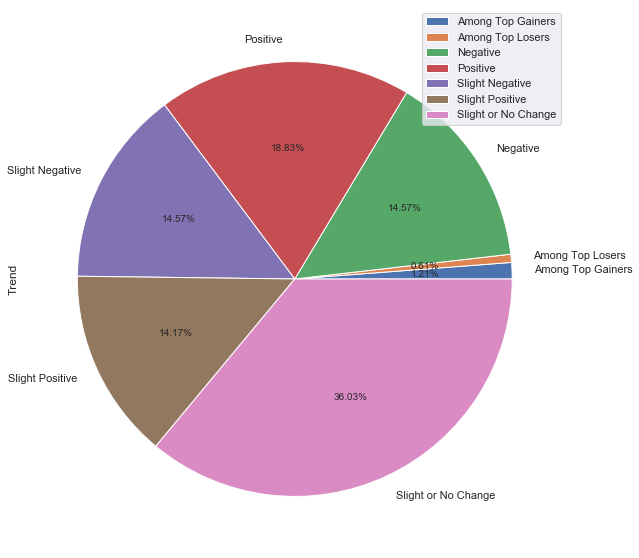

In [23]:
#creating the pie chart based on the 'Trend' column in the above generated dataframe.
data2.plot.pie(y='Trend',figsize=(10,10),autopct='%.2f%%')

In [24]:
#calculating the mean/average of 'Total Traded Quantity' column for each group.
avg = p['Total Traded Quantity'].mean()
avg

Trend
Among Top Gainers      2.613607e+06
Among Top Losers       3.164947e+06
Negative               1.422626e+06
Positive               1.405669e+06
Slight Negative        1.319019e+06
Slight Positive        1.234634e+06
Slight or No Change    1.201715e+06
Name: Total Traded Quantity, dtype: float64

In [25]:
#converting the saved values into a new dataframe.
data3 = avg.to_frame()
data3.rename(columns={'Total Traded Quantity':'mean'},inplace = True)
data3

,mean
Trend,
Among Top Gainers,2.613607e+06
Among Top Losers,3.164947e+06
Negative,1.422626e+06
Positive,1.405669e+06
Slight Negative,1.319019e+06
Slight Positive,1.234634e+06
Slight or No Change,1.201715e+06


Text(0.5, 1.0, 'Mean')

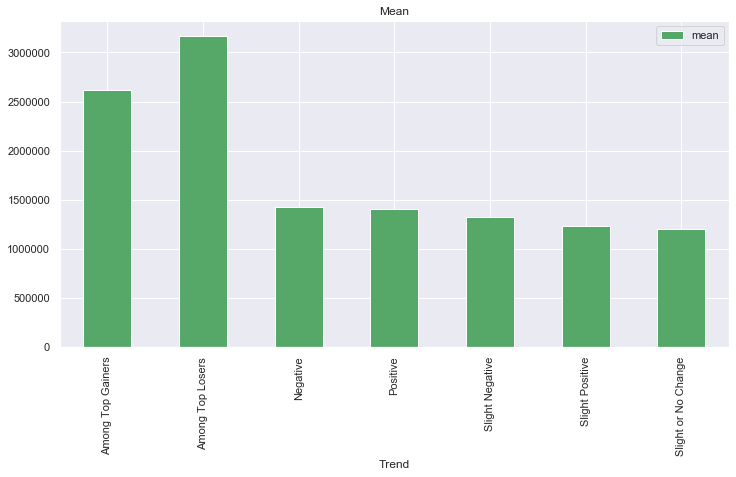

In [26]:
#creating a bar graph/plot with a title 'Mean'.
data3.plot.bar(y='mean',color='g')
plt.title('Mean')

In [27]:
med = p['Total Traded Quantity'].median()
med

Trend
Among Top Gainers      2367385.0
Among Top Losers       1744229.0
Negative               1214795.0
Positive               1374834.0
Slight Negative        1194276.5
Slight Positive        1133172.5
Slight or No Change    1063738.5
Name: Total Traded Quantity, dtype: float64

In [28]:
data4 = med.to_frame()
data4.rename(columns={'Total Traded Quantity':'median'},inplace = True)
data4

,median
Trend,
Among Top Gainers,2367385.0
Among Top Losers,1744229.0
Negative,1214795.0
Positive,1374834.0
Slight Negative,1194276.5
Slight Positive,1133172.5
Slight or No Change,1063738.5


Text(0.5, 1.0, 'Median')

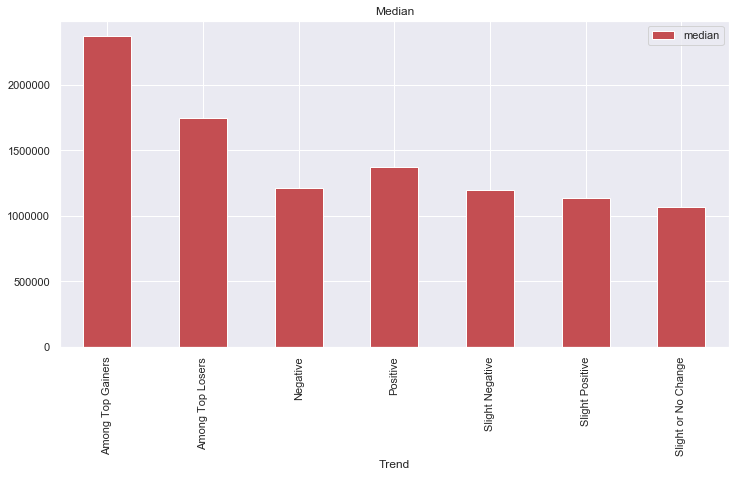

In [29]:
#creating a bar graph/plot with a title 'Median'.
data4.plot.bar(y='median',color='r')
plt.title('Median')

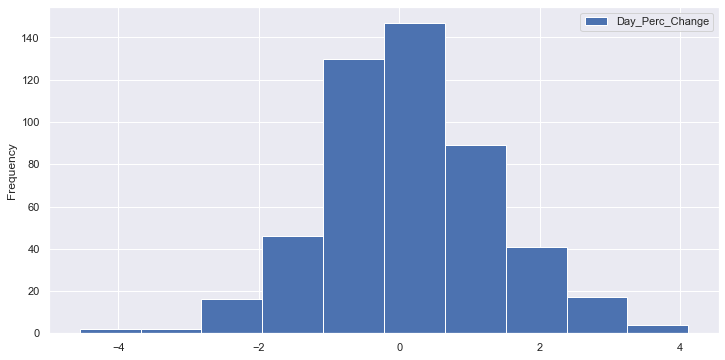

In [30]:
#creating a histogram for the percentage change/daily return for each day.
data1.plot.hist(y='Day_Perc_Change')

In [31]:
# Reading any 5 stocks into 5 dataframes.

In [32]:
#readinng the csv file of 'JET AIRWAYS' stocks.
df1 = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\JETAIRWAYS.csv')

In [33]:
df1 #displaying the stocks.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,15-May-2017,519.45,520.00,533.40,517.10,527.80,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,16-May-2017,527.50,527.00,536.50,524.65,534.00,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,17-May-2017,534.15,532.00,534.75,526.20,530.00,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,18-May-2017,528.90,525.15,538.60,517.50,517.70,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,19-May-2017,522.70,525.60,532.90,517.45,521.00,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,JETAIRWAYS,EQ,07-May-2019,133.40,129.70,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
490,JETAIRWAYS,EQ,08-May-2019,127.30,127.90,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
491,JETAIRWAYS,EQ,09-May-2019,131.35,133.50,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39
492,JETAIRWAYS,EQ,10-May-2019,147.40,150.20,157.90,145.30,146.00,151.75,152.92,22274234,3.406187e+09,193811,1431777,6.43


In [34]:
# checking if there is any row having values other than 'EQ' in the series column.
df1['Series'].unique() 

array(['EQ'], dtype=object)

In [35]:
#readinng the csv file of 'RAYMOND' stocks.
df2 = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\RAYMOND.csv')

In [36]:
df2#displaying the stocks.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74


In [37]:
# checking if there is any row having values other than 'EQ' in the series column.
df2['Series'].unique()

array(['EQ'], dtype=object)

In [38]:
#readinng the csv file of 'CENTURY PLY' stocks.
df3 = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\CENTURYPLY.csv')

In [39]:
df3 #displaying the stocks.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CENTURYPLY,EQ,15-May-2017,255.65,256.75,267.90,254.05,267.50,266.65,263.57,206437,5.441040e+07,4110,116668,56.52
1,CENTURYPLY,EQ,16-May-2017,266.65,270.00,271.00,263.20,265.40,266.10,266.37,221371,5.896697e+07,7157,136850,61.82
2,CENTURYPLY,EQ,17-May-2017,266.10,267.95,267.95,262.00,264.00,264.85,264.49,429282,1.135402e+08,2234,377919,88.04
3,CENTURYPLY,EQ,18-May-2017,264.85,264.00,264.00,253.60,261.00,260.35,259.43,73215,1.899394e+07,1794,24816,33.89
4,CENTURYPLY,EQ,19-May-2017,260.35,261.35,265.00,252.50,254.60,254.05,256.99,105993,2.723916e+07,2206,50131,47.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,CENTURYPLY,EQ,07-May-2019,168.95,169.20,171.60,160.40,162.00,163.15,166.34,197259,3.281114e+07,3386,145537,73.78
490,CENTURYPLY,EQ,08-May-2019,163.15,161.70,164.00,160.90,161.45,161.30,162.06,100234,1.624419e+07,2334,52139,52.02
491,CENTURYPLY,EQ,09-May-2019,161.30,161.00,161.60,158.00,160.50,160.50,160.29,86821,1.391693e+07,2405,49244,56.72
492,CENTURYPLY,EQ,10-May-2019,160.50,163.00,164.90,160.00,160.70,160.50,161.20,249043,4.014667e+07,2817,123842,49.73


In [40]:
# checking if there is any row having values other than 'EQ' in the series column.
df3['Series'].unique()

array(['EQ'], dtype=object)

In [41]:
#readinng the csv file of 'BAJAJ ELEC' stocks.
df4 = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\BAJAJELEC.csv')

In [42]:
df4 #displaying the stocks.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAJELEC,EQ,15-May-2017,350.75,351.20,352.30,339.10,342.00,341.15,344.83,150265,51815366.05,2733,91705,61.03
1,BAJAJELEC,EQ,16-May-2017,341.15,342.90,350.50,341.65,346.60,347.00,346.14,118849,41138046.60,2671,53340,44.88
2,BAJAJELEC,EQ,17-May-2017,347.00,347.10,352.00,345.85,349.50,349.85,349.90,108592,37996454.75,2259,46366,42.70
3,BAJAJELEC,EQ,18-May-2017,349.85,346.95,346.95,331.50,336.00,334.10,339.31,158652,53831647.20,3454,91087,57.41
4,BAJAJELEC,EQ,19-May-2017,334.10,339.05,344.00,332.00,335.50,336.20,338.64,129244,43767310.50,3097,47468,36.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,38066482.60,5173,21908,32.11
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,87171061.90,11144,39062,24.41
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,43278252.70,3990,32290,39.60
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,94880470.80,7768,31813,17.88


In [43]:
# checking if there is any row having values other than 'EQ' in the series column.
df4['Series'].unique()

array(['EQ'], dtype=object)

In [44]:
#readinng the csv file of 'VENKEYS' stocks.
df5 = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\VENKEYS.csv')

In [45]:
df5 #displaying the stocks.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VENKEYS,EQ,15-May-2017,1228.40,1167.00,1244.70,1167.00,1172.00,1169.70,1189.59,99659,1.185535e+08,5436,40813,40.95
1,VENKEYS,EQ,16-May-2017,1169.70,1169.70,1205.65,1135.00,1183.00,1177.00,1172.48,61572,7.219211e+07,4011,22051,35.81
2,VENKEYS,EQ,17-May-2017,1177.00,1177.00,1209.95,1174.20,1188.20,1188.00,1194.72,60769,7.260207e+07,2904,17361,28.57
3,VENKEYS,EQ,18-May-2017,1188.00,1183.00,1188.00,1150.00,1157.00,1156.90,1169.84,28629,3.349137e+07,1699,12506,43.68
4,VENKEYS,EQ,19-May-2017,1156.90,1161.70,1181.00,1141.15,1162.00,1161.65,1163.78,28520,3.319106e+07,1538,11738,41.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VENKEYS,EQ,07-May-2019,2014.90,2025.00,2057.80,1990.00,2013.80,2000.45,2027.54,36714,7.443911e+07,4129,11592,31.57
490,VENKEYS,EQ,08-May-2019,2000.45,1997.90,2000.45,1950.00,1956.75,1956.70,1971.81,29889,5.893555e+07,3671,12658,42.35
491,VENKEYS,EQ,09-May-2019,1956.70,1959.75,1977.95,1921.20,1925.05,1930.10,1946.26,35929,6.992725e+07,4586,13245,36.86
492,VENKEYS,EQ,10-May-2019,1930.10,1935.00,1962.90,1802.20,1810.00,1820.65,1850.03,301338,5.574854e+08,25294,48819,16.20


In [46]:
# checking if there is any row having values other than 'EQ' in the series column.
df5['Series'].unique()

array(['EQ'], dtype=object)

In [47]:
# creating a new dataframe named 'result' which contains only the 'CLose Price'column of each of these stocks
# Also we are renaming respective column of the stock with their respective stock name.
result = df1['Close Price']
result = result.to_frame()
result.rename(columns={"Close Price": "JET AIRWAYS"},inplace = True)
result = result.join(df2['Close Price'])
result.rename(columns={"Close Price": "RAYMOND"},inplace = True)
result = result.join(df3['Close Price'])
result.rename(columns={"Close Price": "CENTURY PLY"},inplace = True)
result = result.join(df4['Close Price'])
result.rename(columns={"Close Price": "BAJAJ ELEC"},inplace = True)
result = result.join(df5['Close Price'])
result.rename(columns={"Close Price": "VENKEYS"},inplace = True)

In [48]:
#analysing the newly created dataframe.
result

,JET AIRWAYS,RAYMOND,CENTURY PLY,BAJAJ ELEC,VENKEYS
0,527.50,772.80,266.65,341.15,1169.70
1,534.15,785.00,266.10,347.00,1177.00
2,528.90,783.65,264.85,349.85,1188.00
3,522.70,746.95,260.35,334.10,1156.90
4,520.40,723.10,254.05,336.20,1161.65
...,...,...,...,...,...
489,127.30,808.95,163.15,557.75,2000.45
490,131.35,807.10,161.30,534.45,1956.70
491,147.40,805.30,160.50,531.85,1930.10
492,151.75,804.40,160.50,540.90,1820.65


In [49]:
# creating a new dataframe named 'res' which is the percentage change of the values of the previous dataframe.
res = result.pct_change()
res # analysing the newly created dataframe.

,JET AIRWAYS,RAYMOND,CENTURY PLY,BAJAJ ELEC,VENKEYS
0,NaN,NaN,NaN,NaN,NaN
1,0.012607,0.015787,-0.002063,0.017148,0.006241
2,-0.009829,-0.001720,-0.004697,0.008213,0.009346
3,-0.011722,-0.046832,-0.016991,-0.045019,-0.026178
4,-0.004400,-0.031930,-0.024198,0.006286,0.004106
...,...,...,...,...,...
489,-0.045727,0.003598,-0.034330,-0.000179,-0.007172
490,0.031815,-0.002287,-0.011339,-0.041775,-0.021870
491,0.122193,-0.002230,-0.004960,-0.004865,-0.013594
492,0.029512,-0.001118,0.000000,0.017016,-0.056707


In [50]:
# dropping all the NaN values from this dataframe.
res = res.dropna()

In [51]:
#analysing the dataframe after dropping the NaN values.
res

,JET AIRWAYS,RAYMOND,CENTURY PLY,BAJAJ ELEC,VENKEYS
1,0.012607,0.015787,-0.002063,0.017148,0.006241
2,-0.009829,-0.001720,-0.004697,0.008213,0.009346
3,-0.011722,-0.046832,-0.016991,-0.045019,-0.026178
4,-0.004400,-0.031930,-0.024198,0.006286,0.004106
5,-0.085992,-0.009888,0.005708,-0.068263,0.049972
...,...,...,...,...,...
489,-0.045727,0.003598,-0.034330,-0.000179,-0.007172
490,0.031815,-0.002287,-0.011339,-0.041775,-0.021870
491,0.122193,-0.002230,-0.004960,-0.004865,-0.013594
492,0.029512,-0.001118,0.000000,0.017016,-0.056707


In [52]:
#multiplying these values with 100 to calculate the exact percentage.
res = res*100

In [53]:
#analysing the dataframe once again.
res

,JET AIRWAYS,RAYMOND,CENTURY PLY,BAJAJ ELEC,VENKEYS
1,1.260664,1.578675,-0.206263,1.714788,0.624092
2,-0.982870,-0.171975,-0.469748,0.821326,0.934579
3,-1.172244,-4.683213,-1.699075,-4.501929,-2.617845
4,-0.440023,-3.192985,-2.419819,0.628554,0.410580
5,-8.599154,-0.988798,0.570754,-6.826294,4.997202
...,...,...,...,...,...
489,-4.572714,0.359779,-3.432968,-0.017926,-0.717157
490,3.181461,-0.228692,-1.133926,-4.177499,-2.187008
491,12.219262,-0.223021,-0.495970,-0.486481,-1.359432
492,2.951153,-0.111760,0.000000,1.701608,-5.670691


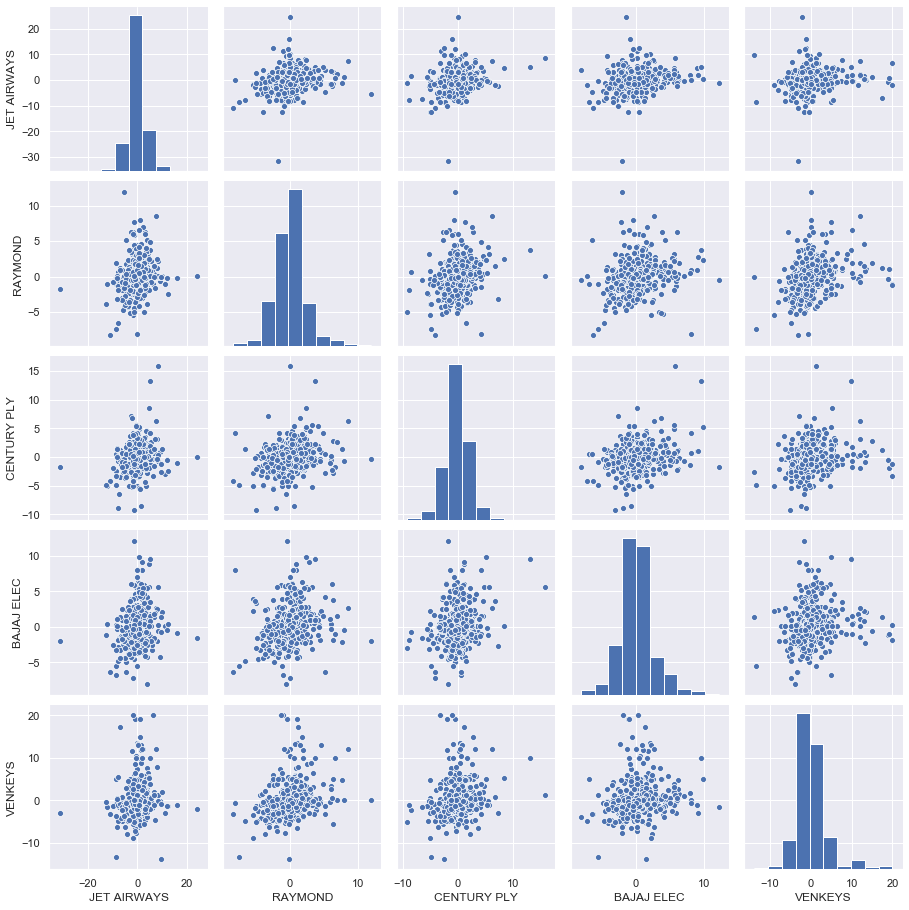

In [54]:
# using seaborn's pairplot function to analyse the correlation between the percentage changes in the five stocks.
sns.pairplot(res)

In [55]:
# creating a pandas series of the CLOSE PRICE of RAYMOND company's stocks obtained from 'res' dataframe.
p = res['RAYMOND']

In [56]:
p #checking if the values got extracted correctly

1      1.578675
2     -0.171975
3     -4.683213
4     -3.192985
5     -0.988798
         ...   
489    0.359779
490   -0.228692
491   -0.223021
492   -0.111760
493   -3.114122
Name: RAYMOND, Length: 493, dtype: float64

In [57]:
type(p) #checking the type of 'p'

pandas.core.series.Series

In [58]:
# calculating the 7 day rolling average of percentage change of 'RAYMOND' stock price and then computing standard deviation
# afterwards
p = p.rolling(7).std()

In [59]:
p

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
489    3.052866
490    3.047437
491    3.062626
492    3.048404
493    2.851559
Name: RAYMOND, Length: 493, dtype: float64

In [60]:
sns.set(style = 'white') #setting the styling of the graph from 'darkgrid' to 'white'.

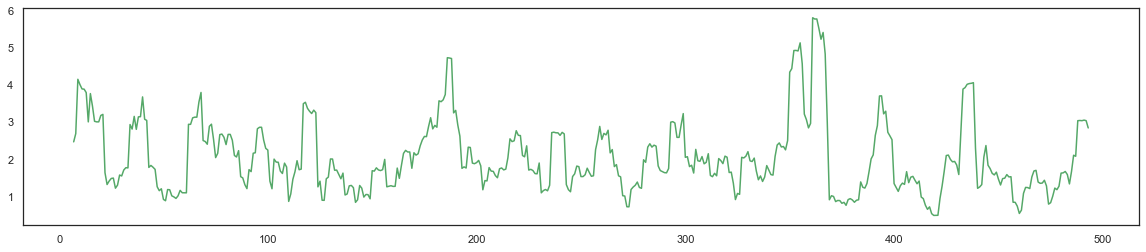

In [61]:
p.plot(figsize=(20,4),color='g') #plotting the price.

In [63]:
# calculating the volatility of NIFTY.
nifty= pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Nifty50\Nifty50\Nifty50.csv') #reading the csv file.

In [64]:
nifty # analysing the data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


In [65]:
#creating a pandas series for the 'Close' column in nifty.
nif = nifty['Close'] 

In [66]:
#converting the series to a dataframe named 'nif'.
nif = nif.to_frame()

In [67]:
#analysing 'nif'.
nif

,Close
0,9445.40
1,9512.25
2,9525.75
3,9429.45
4,9427.90
...,...
489,11497.90
490,11359.45
491,11301.80
492,11278.90


In [68]:
#renaming the column 'Close' to 'NIFTY'
nif.rename(columns={"Close": "NIFTY"},inplace = True) 

In [69]:
#calculating the percentage change in that column
nif = nif.pct_change()
nif

,NIFTY
0,NaN
1,0.007078
2,0.001419
3,-0.010109
4,-0.000164
...,...
489,-0.008652
490,-0.012041
491,-0.005075
492,-0.002026


In [70]:
#dropping the NaN values.
nif = nif.dropna()

In [71]:
#calculating the exact percentage.
nif =nif*100

In [72]:
nif #analysing the dataframe.

,NIFTY
1,0.707752
2,0.141922
3,-1.010944
4,-0.016438
5,0.109781
...,...
489,-0.865217
490,-1.204133
491,-0.507507
492,-0.202623


In [73]:
# creating a pandas series of the NIFTY obtained from 'nif' dataframe.
q = nif['NIFTY']

In [74]:
q

1      0.707752
2      0.141922
3     -1.010944
4     -0.016438
5      0.109781
         ...   
489   -0.865217
490   -1.204133
491   -0.507507
492   -0.202623
493   -1.158801
Name: NIFTY, Length: 493, dtype: float64

In [75]:
type(q) #checking the type of 'q'

pandas.core.series.Series

In [76]:
# calculating the 7 day rolling average of percentage change of 'NIFTY' stock price and then computing standard deviation
# afterwards
q = q.rolling(7).std()
q

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
489    0.666354
490    0.740837
491    0.460459
492    0.436348
493    0.447439
Name: NIFTY, Length: 493, dtype: float64

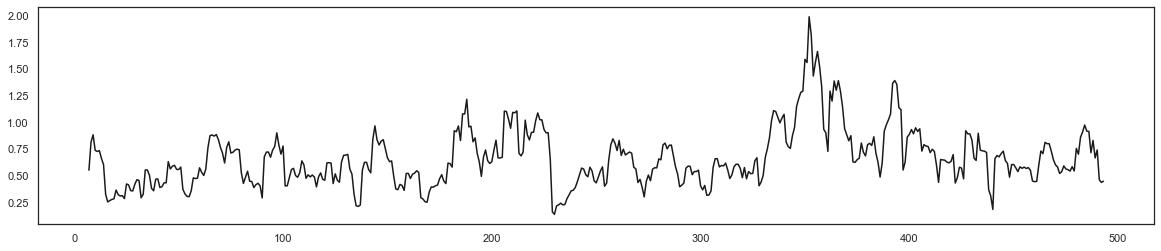

In [77]:
q.plot(figsize = (20,4),color='k') #plotting nifty.

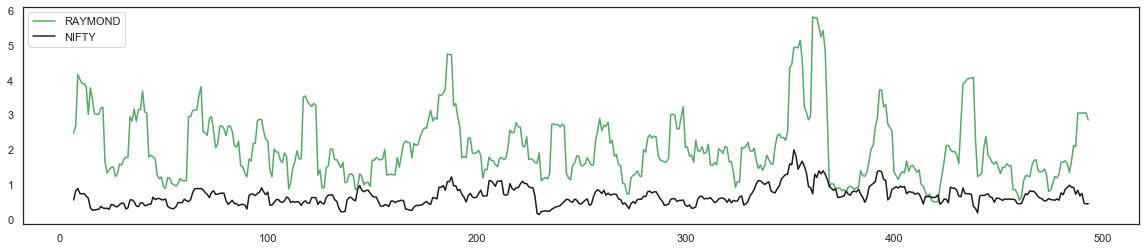

In [78]:
#Comparing the volatility of NIFTY's and RAYMOND's stocks.
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(p , 'g', label='RAYMOND')
ax.plot(q, 'k', label='NIFTY')

plt.legend(loc=2)

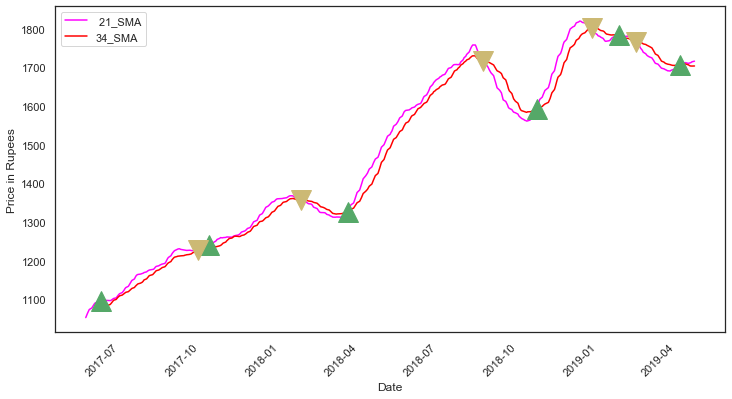

In [79]:
#Plotting the 21day and 34 day moving averages and also marking the buy and sell calls.
dt = pd.DataFrame(index=data1.index)
dt['pos'] = 0.0

#SMA of 21
dt['short_MA'] = data1['Average Price'].rolling(window=21).mean()

#SMA of 34
dt['long_MA'] = data1['Average Price'].rolling(window=34).mean()

#Create pos
dt['pos'][21:] = np.where(dt['short_MA'][21:] > dt['long_MA'][21:], 1.0,0.0)

#Generate trading orders
dt['positions'] = dt['pos'].diff()

plt.plot(data1.index, dt['short_MA'], label=' 21_SMA', color='magenta')
plt.plot(data1.index,dt['long_MA'], label='34_SMA', color='red')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price in Rupees')

#Plot the buy calls
plt.plot(dt.loc[dt.positions == 1.0].index, dt.short_MA[dt.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell calls
plt.plot(dt.loc[dt.positions == -1.0].index,dt.short_MA[dt.positions == -1.0], 'v' , markersize=20,color='y')

In [80]:
#analysing the 'dt' dataframe obtained 
dt

,pos,short_MA,long_MA,positions
Date,,,,
2017-05-15,0.0,NaN,NaN,NaN
2017-05-16,0.0,NaN,NaN,0.0
2017-05-17,0.0,NaN,NaN,0.0
2017-05-18,0.0,NaN,NaN,0.0
2017-05-19,0.0,NaN,NaN,0.0
...,...,...,...,...
2019-05-07,1.0,1711.372381,1705.598529,0.0
2019-05-08,1.0,1711.783810,1704.124412,0.0
2019-05-09,1.0,1712.916190,1703.924412,0.0


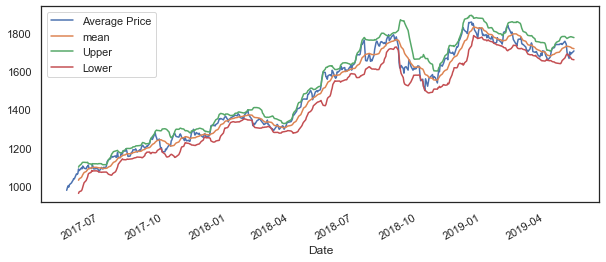

In [81]:
# Plotting Bollinger Bands for this stock.
data1['mean'] = data1['Close Price'].rolling(window=14).mean()
data1['STD'] = data1['Close Price'].rolling(window=14).std() 
data1['Upper'] = data1['mean'] + (data1['STD'] * 2)
data1['Lower'] = data1['mean'] - (data1['STD'] * 2)
data1[['Average Price','mean','Upper','Lower']].plot(figsize=(10,4))

In [82]:
#saving to a CSV file.
data1.to_csv('week3.csv')